<a href="https://colab.research.google.com/github/HamdanXI/nlp_adventure/blob/main/asr-privacy/plotting_dataset_split.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


data-00000-of-00010.arrow:   0%|          | 0.00/411M [00:00<?, ?B/s]

data-00001-of-00010.arrow:   0%|          | 0.00/455M [00:00<?, ?B/s]

data-00002-of-00010.arrow:   0%|          | 0.00/532M [00:00<?, ?B/s]

data-00003-of-00010.arrow:   0%|          | 0.00/612M [00:00<?, ?B/s]

data-00004-of-00010.arrow:   0%|          | 0.00/594M [00:00<?, ?B/s]

data-00005-of-00010.arrow:   0%|          | 0.00/432M [00:00<?, ?B/s]

data-00006-of-00010.arrow:   0%|          | 0.00/570M [00:00<?, ?B/s]

data-00007-of-00010.arrow:   0%|          | 0.00/390M [00:00<?, ?B/s]

data-00008-of-00010.arrow:   0%|          | 0.00/540M [00:00<?, ?B/s]

data-00009-of-00010.arrow:   0%|          | 0.00/428M [00:00<?, ?B/s]

Generating validation split:   0%|          | 0/5736 [00:00<?, ? examples/s]

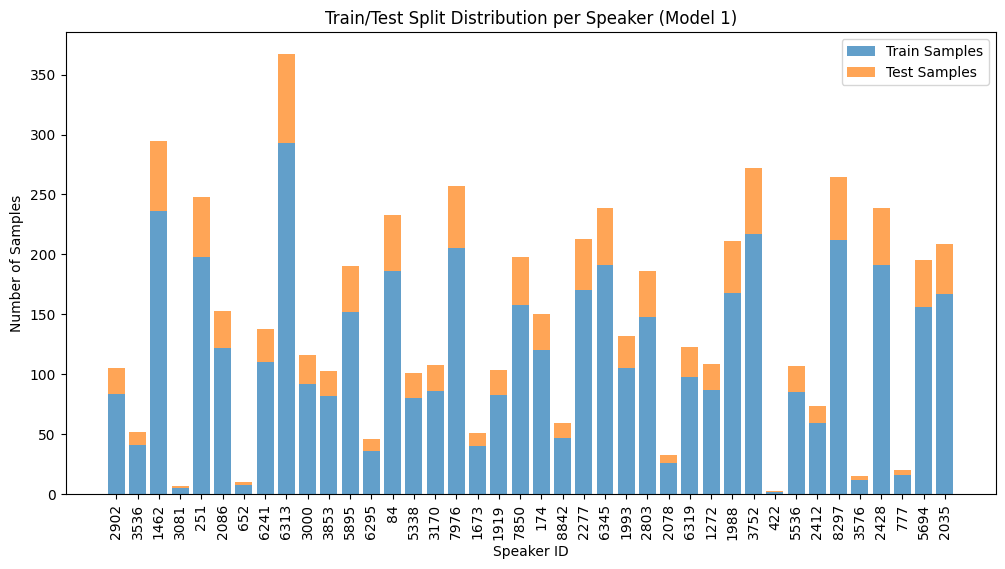

In [2]:
import random
import matplotlib.pyplot as plt
from collections import defaultdict
from datasets import load_dataset

# Load dataset
dataset = load_dataset("HamdanXI/processed_libritts_dev_dataset_l0")["validation"]

# Group rows by speaker_id
grouped = defaultdict(list)
for idx, spk_id in enumerate(dataset["speaker_id"]):
    grouped[spk_id].append(idx)

# Make train/test splits
train_counts, test_counts = {}, {}
for spk_id, indices in grouped.items():
    random.shuffle(indices)
    split_idx = int(0.8 * len(indices))

    train_counts[spk_id] = len(indices[:split_idx])
    test_counts[spk_id] = len(indices[split_idx:])

# Plot the train/test split for each speaker
speakers = list(train_counts.keys())
train_sizes = [train_counts[spk] for spk in speakers]
test_sizes = [test_counts[spk] for spk in speakers]

plt.figure(figsize=(12, 6))
plt.bar(speakers, train_sizes, label="Train Samples", alpha=0.7)
plt.bar(speakers, test_sizes, label="Test Samples", alpha=0.7, bottom=train_sizes)
plt.xlabel("Speaker ID")
plt.ylabel("Number of Samples")
plt.title("Train/Test Split Distribution per Speaker (Model 1)")
plt.legend()
plt.xticks(rotation=90)
plt.show()

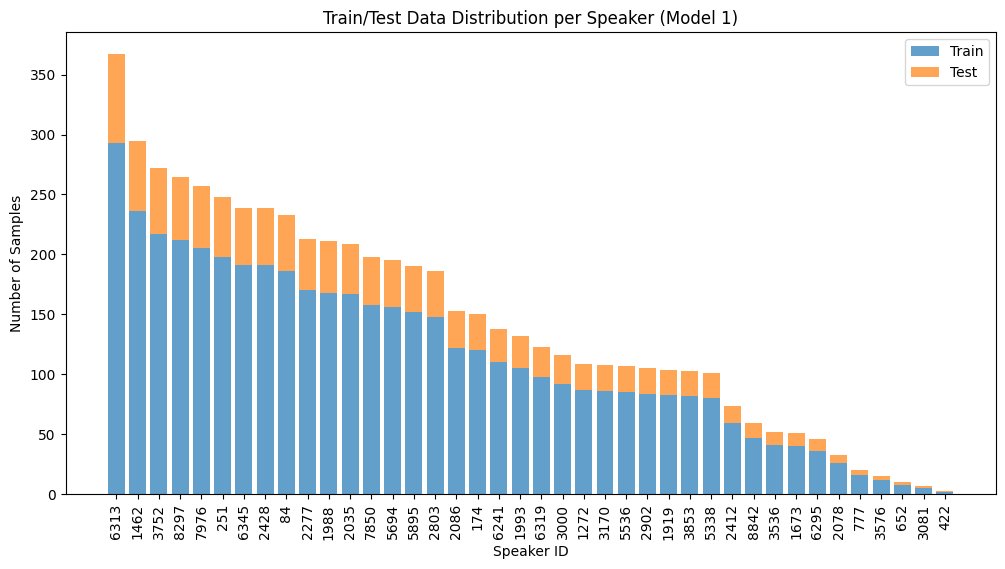

In [13]:
import random
import matplotlib.pyplot as plt
from collections import defaultdict
from datasets import load_dataset

# Load dataset
dataset = load_dataset("HamdanXI/processed_libritts_dev_dataset_l0")["validation"]

# Group rows by speaker_id
grouped = defaultdict(list)
for idx, spk_id in enumerate(dataset["speaker_id"]):
    grouped[spk_id].append(idx)

# Make train/test splits
train_counts, test_counts = {}, {}
for spk_id, indices in grouped.items():
    random.shuffle(indices)
    split_idx = int(0.8 * len(indices))

    train_counts[spk_id] = len(indices[:split_idx])
    test_counts[spk_id] = len(indices[split_idx:])

# Sort speakers by total number of samples (train + test) in descending order
sorted_speakers = sorted(train_counts.keys(), key=lambda spk: train_counts[spk] + test_counts[spk], reverse=True)

# Reorder the train and test sizes accordingly
sorted_train_sizes = [train_counts[spk] for spk in sorted_speakers]
sorted_test_sizes = [test_counts[spk] for spk in sorted_speakers]

# Plot the reordered train/test split for each speaker
plt.figure(figsize=(12, 6))
plt.bar(sorted_speakers, sorted_train_sizes, label="Train", alpha=0.7)
plt.bar(sorted_speakers, sorted_test_sizes, label="Test", alpha=0.7, bottom=sorted_train_sizes)
plt.xlabel("Speaker ID")
plt.ylabel("Number of Samples")
plt.title("Train/Test Data Distribution per Speaker (Model 1)")
plt.legend()
plt.xticks(rotation=90)
plt.show()

README.md:   0%|          | 0.00/590 [00:00<?, ?B/s]

train-00000-of-00004.parquet:   0%|          | 0.00/336M [00:00<?, ?B/s]

train-00001-of-00004.parquet:   0%|          | 0.00/470M [00:00<?, ?B/s]

train-00002-of-00004.parquet:   0%|          | 0.00/376M [00:00<?, ?B/s]

train-00003-of-00004.parquet:   0%|          | 0.00/356M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/5736 [00:00<?, ? examples/s]

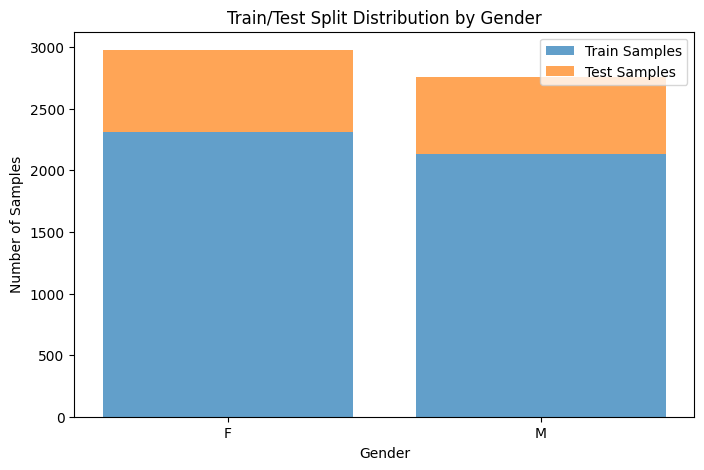

In [4]:
import random
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.model_selection import train_test_split
from datasets import load_dataset

# Load dataset from Hugging Face
dataset = load_dataset("HamdanXI/libritts_dev_dataset_gender")["train"]

# Create a dictionary {speaker_id -> gender}
speaker2gender = {}
for spk_id, gen in zip(dataset["speaker_id"], dataset["gender"]):
    if spk_id not in speaker2gender:
        speaker2gender[spk_id] = gen

# Put it into a small DataFrame so we can use stratified splitting
df_speakers = pd.DataFrame(
    {
        "speaker_id": list(speaker2gender.keys()),
        "gender": list(speaker2gender.values())
    }
)

# Stratify by gender to preserve distribution in train/test
train_df, test_df = train_test_split(
    df_speakers,
    test_size=0.2,  # Adjust as needed
    stratify=df_speakers["gender"],
    random_state=42
)

# Convert to sets for faster membership checks
train_speakers = set(train_df["speaker_id"])
test_speakers = set(test_df["speaker_id"])

# Count samples per gender in train and test sets
train_gender_counts = defaultdict(int)
test_gender_counts = defaultdict(int)

for i, spk_id in enumerate(dataset["speaker_id"]):
    gender = speaker2gender[spk_id]
    if spk_id in train_speakers:
        train_gender_counts[gender] += 1
    elif spk_id in test_speakers:
        test_gender_counts[gender] += 1

# Sort genders for consistency
genders = sorted(train_gender_counts.keys())
train_sizes = [train_gender_counts[g] for g in genders]
test_sizes = [test_gender_counts[g] for g in genders]

# Plot gender distribution in train/test splits
plt.figure(figsize=(8, 5))
plt.bar(genders, train_sizes, label="Train Samples", alpha=0.7)
plt.bar(genders, test_sizes, label="Test Samples", alpha=0.7, bottom=train_sizes)
plt.xlabel("Gender")
plt.ylabel("Number of Samples")
plt.title("Train/Test Split Distribution by Gender")
plt.legend()
plt.show()

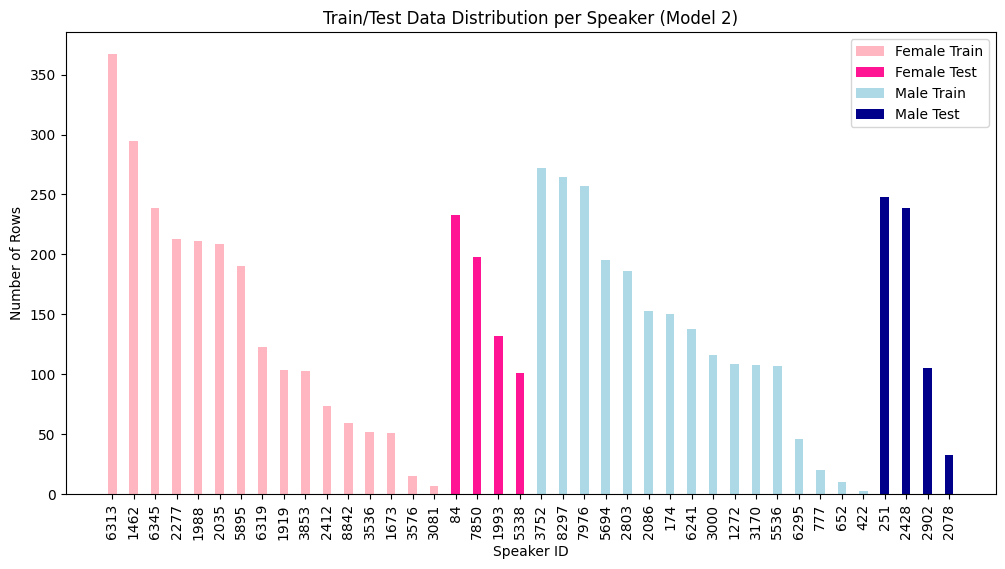

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
from sklearn.model_selection import train_test_split

# Load dataset
dataset = load_dataset("HamdanXI/libritts_dev_dataset_gender")["train"]

# Create a dictionary {speaker_id -> gender}
speaker2gender = {spk_id: gen for spk_id, gen in zip(dataset["speaker_id"], dataset["gender"])}

# Put it into a small DataFrame so we can use stratified split
df_speakers = pd.DataFrame({
    "speaker_id": list(speaker2gender.keys()),
    "gender": list(speaker2gender.values())
})

# Stratify by gender to preserve distribution in train/test
train_df, test_df = train_test_split(
    df_speakers,
    test_size=0.2,  # 20% of speakers in test set
    stratify=df_speakers["gender"],
    random_state=42
)

# Convert to sets for faster membership checks
train_speakers = set(train_df["speaker_id"])
test_speakers = set(test_df["speaker_id"])

# Count rows per speaker in train/test sets
train_counts = {spk_id: 0 for spk_id in train_speakers}
test_counts = {spk_id: 0 for spk_id in test_speakers}

for spk_id in dataset["speaker_id"]:
    if spk_id in train_speakers:
        train_counts[spk_id] += 1
    elif spk_id in test_speakers:
        test_counts[spk_id] += 1

# Convert counts to DataFrame
train_df = pd.DataFrame(list(train_counts.items()), columns=["speaker_id", "train_rows"])
test_df = pd.DataFrame(list(test_counts.items()), columns=["speaker_id", "test_rows"])

# Merge with gender information
train_df["gender"] = train_df["speaker_id"].map(speaker2gender)
test_df["gender"] = test_df["speaker_id"].map(speaker2gender)

# Merge train and test data
merged_df = train_df.merge(test_df, on=["speaker_id", "gender"], how="outer").fillna(0)

# Sorting: First by color category, then by descending row count
merged_df["sort_order"] = merged_df.apply(
    lambda row: (0, -row["train_rows"]) if row["gender"] == "F" else
                (1, -row["train_rows"]) if row["gender"] == "M" else
                (2, -row["test_rows"]) if row["gender"] == "F" else
                (3, -row["test_rows"]),
    axis=1
)

# Apply sorting
merged_df = merged_df.sort_values(by=["sort_order", "train_rows", "test_rows"], ascending=[True, False, False])

# Plot
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.4
x = range(len(merged_df))

# Colors
light_pink = "#FFB6C1"  # Female Train
dark_pink = "#FF1493"   # Female Test
light_blue = "#ADD8E6"  # Male Train
dark_blue = "#00008B"   # Male Test

ax.bar(x, merged_df["train_rows"].where(merged_df["gender"] == "F", 0), width=bar_width, label="Female Train", color=light_pink)
ax.bar(x, merged_df["test_rows"].where(merged_df["gender"] == "F", 0), width=bar_width, bottom=merged_df["train_rows"].where(merged_df["gender"] == "F", 0), label="Female Test", color=dark_pink)
ax.bar(x, merged_df["train_rows"].where(merged_df["gender"] == "M", 0), width=bar_width, label="Male Train", color=light_blue)
ax.bar(x, merged_df["test_rows"].where(merged_df["gender"] == "M", 0), width=bar_width, bottom=merged_df["train_rows"].where(merged_df["gender"] == "M", 0), label="Male Test", color=dark_blue)

# Labels and legend
ax.set_xlabel("Speaker ID")
ax.set_ylabel("Number of Rows")
ax.set_title("Train/Test Data Distribution per Speaker (Model 2)")
ax.set_xticks(x)
ax.set_xticklabels(merged_df["speaker_id"], rotation=90)
ax.set_ylim(0, max(merged_df["train_rows"].max(), merged_df["test_rows"].max()) * 1.05)
ax.legend()

plt.show()